In [ ]:
## Python Programming for Finance, Data handling and Graphing,
## Data Manipulation



In [2]:
## Python Programming for Finance
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web 

style.use('ggplot')

In [3]:
## Scraping DataFrame from yahoo

start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

df = web.DataReader('TSLA','yahoo',start,end)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.shape

(1640, 6)

In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600


In [7]:
## Creates CSV for tesla

df.to_csv('tsla.csv')

In [8]:
## Notice how we have 0,1,2,3,4 instead of the DataFrame Above,
## We can get rid of this by passing statements in pd.read_csv

df = pd.read_csv('tsla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:
## Reading from csv...

df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


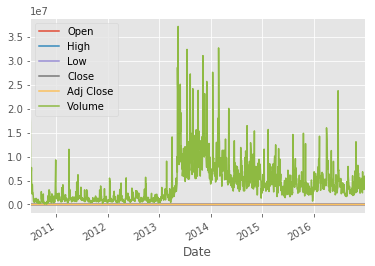

In [10]:
## Plot everything, note how only Volume is noticable as it size is much larger
## than most other variable 

df.plot()
plt.show()

In [12]:
## Find out columns names
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
## can use the following lines to loop through each plot

#for eachcolumn in df.columns:
    
#    df[eachcolumn].plot()
#    plt.show()

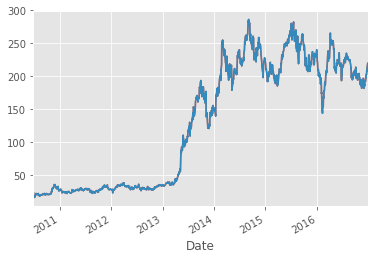

In [17]:
df['Adj Close'].plot()
plt.show()

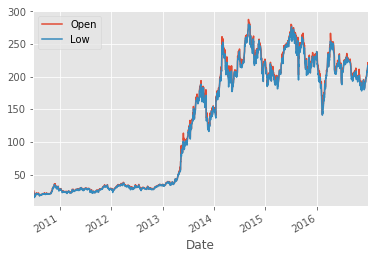

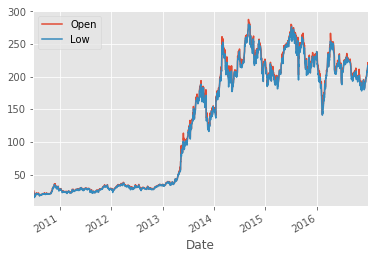

In [19]:
df1 = df[['Open','Low']]
df1.plot()
plt.show()

In [20]:
df1.head()

,Open,Low
Date,,
2010-06-29,19.000000,17.540001
2010-06-30,25.790001,23.299999
2010-07-01,25.000000,20.270000
2010-07-02,23.000000,18.709999
2010-07-06,20.000000,15.830000


In [24]:
## Data manipulation - rolling index

## notice the top 100 won't have any because there isnt a window of 100 days
## to calculate from

df['100ma'] =  df['Adj Close'].rolling(window=100, min_periods = 0).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-11-17,30.200001,30.750000,28.610001,29.490000,29.490000,750000,29.490000
2010-11-18,30.670000,30.740000,28.920000,29.889999,29.889999,956100,29.689999
2010-11-19,30.160000,31.370001,29.700001,30.990000,30.990000,1150500,30.123333
2010-11-22,31.570000,33.450001,31.500000,33.400002,33.400002,1529700,30.942500
2010-11-23,33.290001,35.680000,32.189999,34.570000,34.570000,1577800,31.668000


In [25]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900,202.6190
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700,202.5082
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500,202.4053
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900,202.2905
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600,202.1366


In [26]:
df.dropna(inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-11-17,30.200001,30.750000,28.610001,29.490000,29.490000,750000,29.490000
2010-11-18,30.670000,30.740000,28.920000,29.889999,29.889999,956100,29.689999
2010-11-19,30.160000,31.370001,29.700001,30.990000,30.990000,1150500,30.123333
2010-11-22,31.570000,33.450001,31.500000,33.400002,33.400002,1529700,30.942500
2010-11-23,33.290001,35.680000,32.189999,34.570000,34.570000,1577800,31.668000


In [29]:
df.index()

TypeError: 'DatetimeIndex' object is not callable

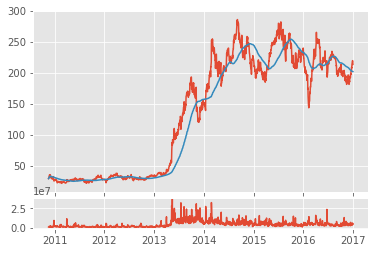

In [31]:
ax1 =  plt.subplot2grid((6,1),(0,0), rowspan = 5, colspan = 1)
ax2 =  plt.subplot2grid((6,1),(5,0), rowspan = 1, colspan = 1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['Volume'])
plt.show()
